In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Q1. Load the dataset

In [2]:
df_pd=pd.read_csv('parkinsons.data',sep=',')

# Q2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.¶

In [3]:
df_pd.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df_pd.columns.T

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [5]:
df_pd.shape

(195, 24)

In [6]:
df_pd.head(12)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [7]:
df_pd[df_pd.isna()==True].count()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [9]:
df_pd['status'].sum() #Count of status 1 (PD patients)

147

In [10]:
df_pd.shape[0]-df_pd['status'].sum()  #Count of status 0 (non PD patients)

48

In [11]:
df_pd[df_pd['status']==0]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
30,phon_R01_S07_1,197.076,206.896,192.055,0.00289,0.000010,0.00166,0.00168,0.00498,0.01098,...,0.01689,0.00339,26.775,0,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569
31,phon_R01_S07_2,199.228,209.512,192.091,0.00241,0.000010,0.00134,0.00138,0.00402,0.01015,...,0.01513,0.00167,30.940,0,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501
32,phon_R01_S07_3,198.383,215.203,193.104,0.00212,0.000010,0.00113,0.00135,0.00339,0.01263,...,0.01919,0.00119,30.775,0,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
33,phon_R01_S07_4,202.266,211.604,197.079,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,...,0.01407,0.00072,32.684,0,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
34,phon_R01_S07_5,203.184,211.526,196.160,0.00178,0.000009,0.00094,0.00106,0.00283,0.00958,...,0.01403,0.00065,33.047,0,0.340068,0.741899,-7.964984,0.163519,1.423287,0.044539
35,phon_R01_S07_6,201.464,210.565,195.708,0.00198,0.000010,0.00105,0.00115,0.00314,0.01194,...,0.01758,0.00135,31.732,0,0.344252,0.742737,-7.777685,0.170183,2.447064,0.057610
42,phon_R01_S10_1,237.226,247.326,225.227,0.00298,0.000010,0.00169,0.00182,0.00507,0.01752,...,0.03104,0.00740,22.736,0,0.305062,0.654172,-7.310550,0.098648,2.416838,0.095032
43,phon_R01_S10_2,241.404,248.834,232.483,0.00281,0.000010,0.00157,0.00173,0.00470,0.01760,...,0.03017,0.00675,23.145,0,0.457702,0.634267,-6.793547,0.158266,2.256699,0.117399
44,phon_R01_S10_3,243.439,250.912,232.435,0.00210,0.000009,0.00109,0.00137,0.00327,0.01419,...,0.02330,0.00454,25.368,0,0.438296,0.635285,-7.057869,0.091608,2.330716,0.091470
45,phon_R01_S10_4,242.852,255.034,227.911,0.00225,0.000009,0.00117,0.00139,0.00350,0.01494,...,0.02542,0.00476,25.032,0,0.431285,0.638928,-6.995820,0.102083,2.365800,0.102706


In [12]:
Y=df_pd['status']

In [13]:
X=df_pd.drop(['name','status'],axis=1)

# 3. Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations?

In [14]:
X.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [15]:
count=0
for col in X.columns:
    print("Mean and Median value of feature {} are {} and {} respectively".format(col,X[col].mean(),X[col].median()))
    q25=np.percentile(X[col],25)
    q75=np.percentile(X[col],75)
    IQR=q75-q25
    lower=(q25-(1.5*IQR))
    upper=(q75+(1.5*IQR))
    outliers=[]
    for val in X[col]:
        if (val < lower) | (val > upper):
            outliers.append(val)
            
            
    try:
        if len(outliers) > 0:
            print("Outliers in feature {} are {}".format(col,outliers))
            print("")
    except NameError:
        print("No Outliers in feature {}".format(col))
            

Mean and Median value of feature MDVP:Fo(Hz) are 154.22864102564105 and 148.79 respectively
Mean and Median value of feature MDVP:Fhi(Hz) are 197.104917948718 and 175.829 respectively
Outliers in feature MDVP:Fhi(Hz) are [588.518, 586.567, 492.892, 442.557, 450.247, 442.824, 479.697, 565.74, 592.03, 581.289, 396.961]

Mean and Median value of feature MDVP:Flo(Hz) are 116.32463076923077 and 104.315 respectively
Outliers in feature MDVP:Flo(Hz) are [225.227, 232.483, 232.435, 227.911, 231.848, 223.634, 229.256, 237.303, 239.17]

Mean and Median value of feature MDVP:Jitter(%) are 0.006220461538461539 and 0.00494 respectively
Outliers in feature MDVP:Jitter(%) are [0.01378, 0.01936, 0.03316, 0.01551, 0.03011, 0.01568, 0.01466, 0.01719, 0.01627, 0.01872, 0.03107, 0.027139999999999997, 0.01813, 0.0136]

Mean and Median value of feature MDVP:Jitter(Abs) are 4.395897435897438e-05 and 2.9999999999999997e-05 respectively
Outliers in feature MDVP:Jitter(Abs) are [0.00015, 0.00026000000000000003,

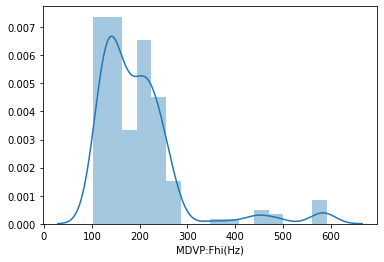

In [16]:
sns.distplot(X['MDVP:Fhi(Hz)'])

<Figure size 1440x1440 with 0 Axes>

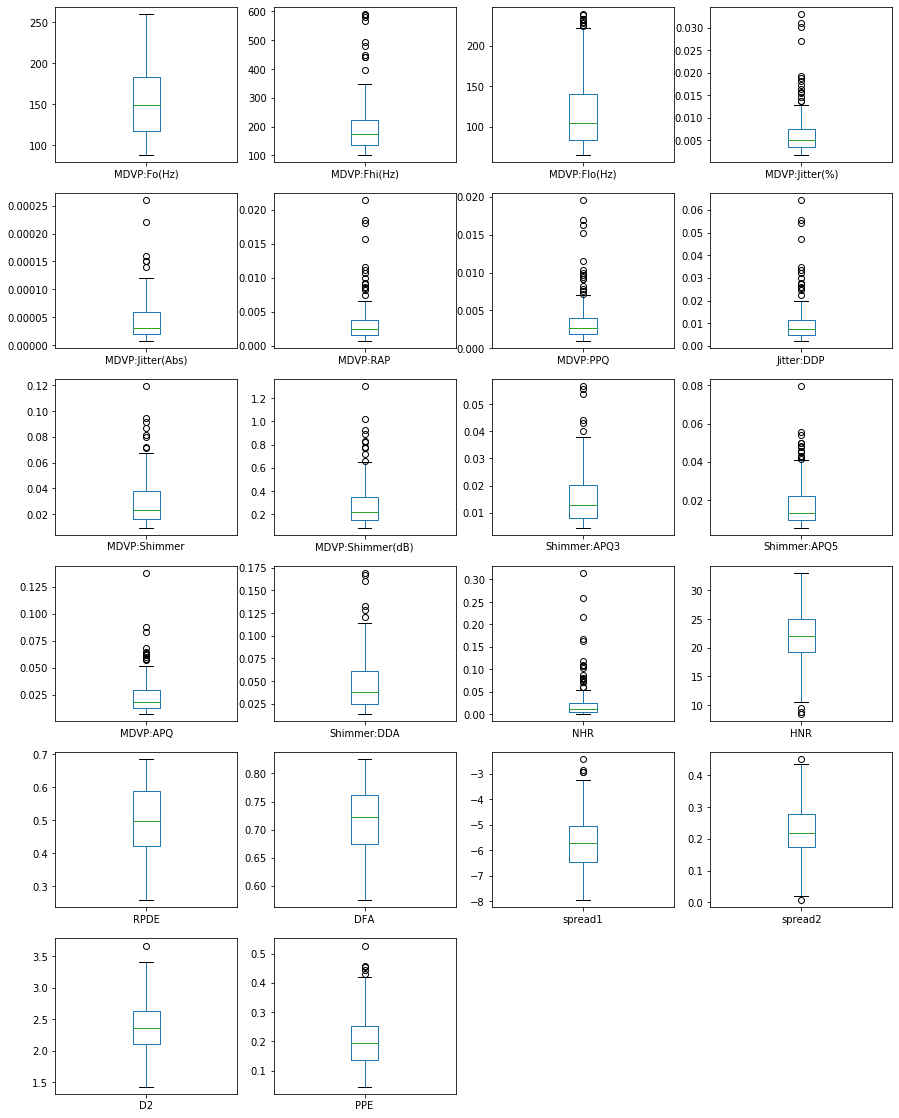

In [17]:
plt.figure(figsize=(20,20))
X.plot(kind='box', subplots=True,layout = (6,4),sharex=False, sharey=False,figsize=(15,20))
plt.show()

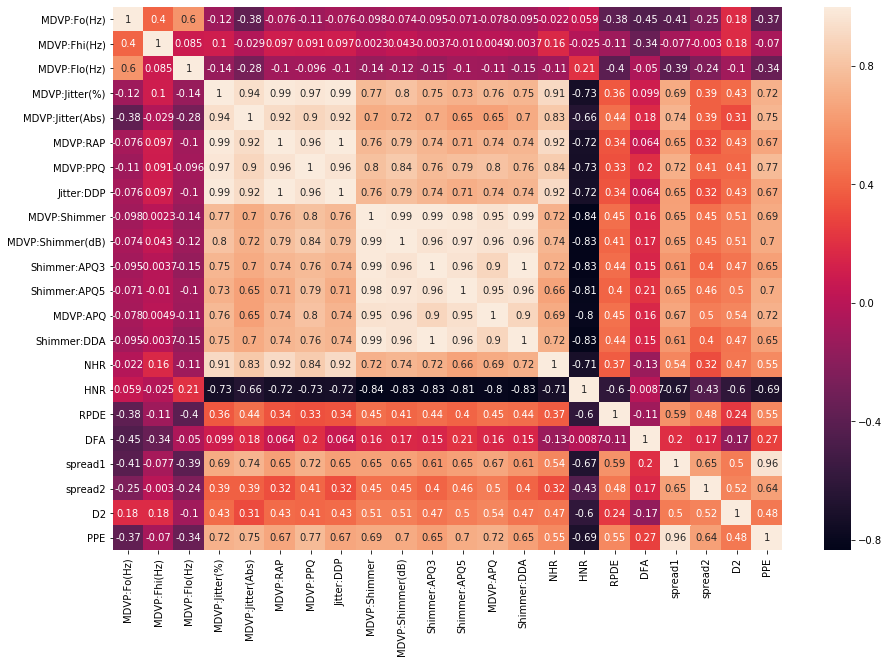

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(X.corr(),annot=True)

In [19]:
for col in X.columns:
    for oth_cols in X.columns:
        if oth_cols == col:
            continue
        
        if X[col].corr(X[oth_cols]) > 0.8:
            print("There is very high Correlation between feature {} and {} - {}".format(col,oth_cols,X[col].corr(X[oth_cols])))


There is very high Correlation between feature MDVP:Jitter(%) and MDVP:Jitter(Abs) - 0.9357139812023573
There is very high Correlation between feature MDVP:Jitter(%) and MDVP:RAP - 0.9902755852458308
There is very high Correlation between feature MDVP:Jitter(%) and MDVP:PPQ - 0.9742563864635715
There is very high Correlation between feature MDVP:Jitter(%) and Jitter:DDP - 0.9902762153275689
There is very high Correlation between feature MDVP:Jitter(%) and MDVP:Shimmer(dB) - 0.8042892804109825
There is very high Correlation between feature MDVP:Jitter(%) and NHR - 0.9069586005733018
There is very high Correlation between feature MDVP:Jitter(Abs) and MDVP:Jitter(%) - 0.9357139812023573
There is very high Correlation between feature MDVP:Jitter(Abs) and MDVP:RAP - 0.9229109688984646
There is very high Correlation between feature MDVP:Jitter(Abs) and MDVP:PPQ - 0.8977779044154581
There is very high Correlation between feature MDVP:Jitter(Abs) and Jitter:DDP - 0.9229130329829802
There is ve

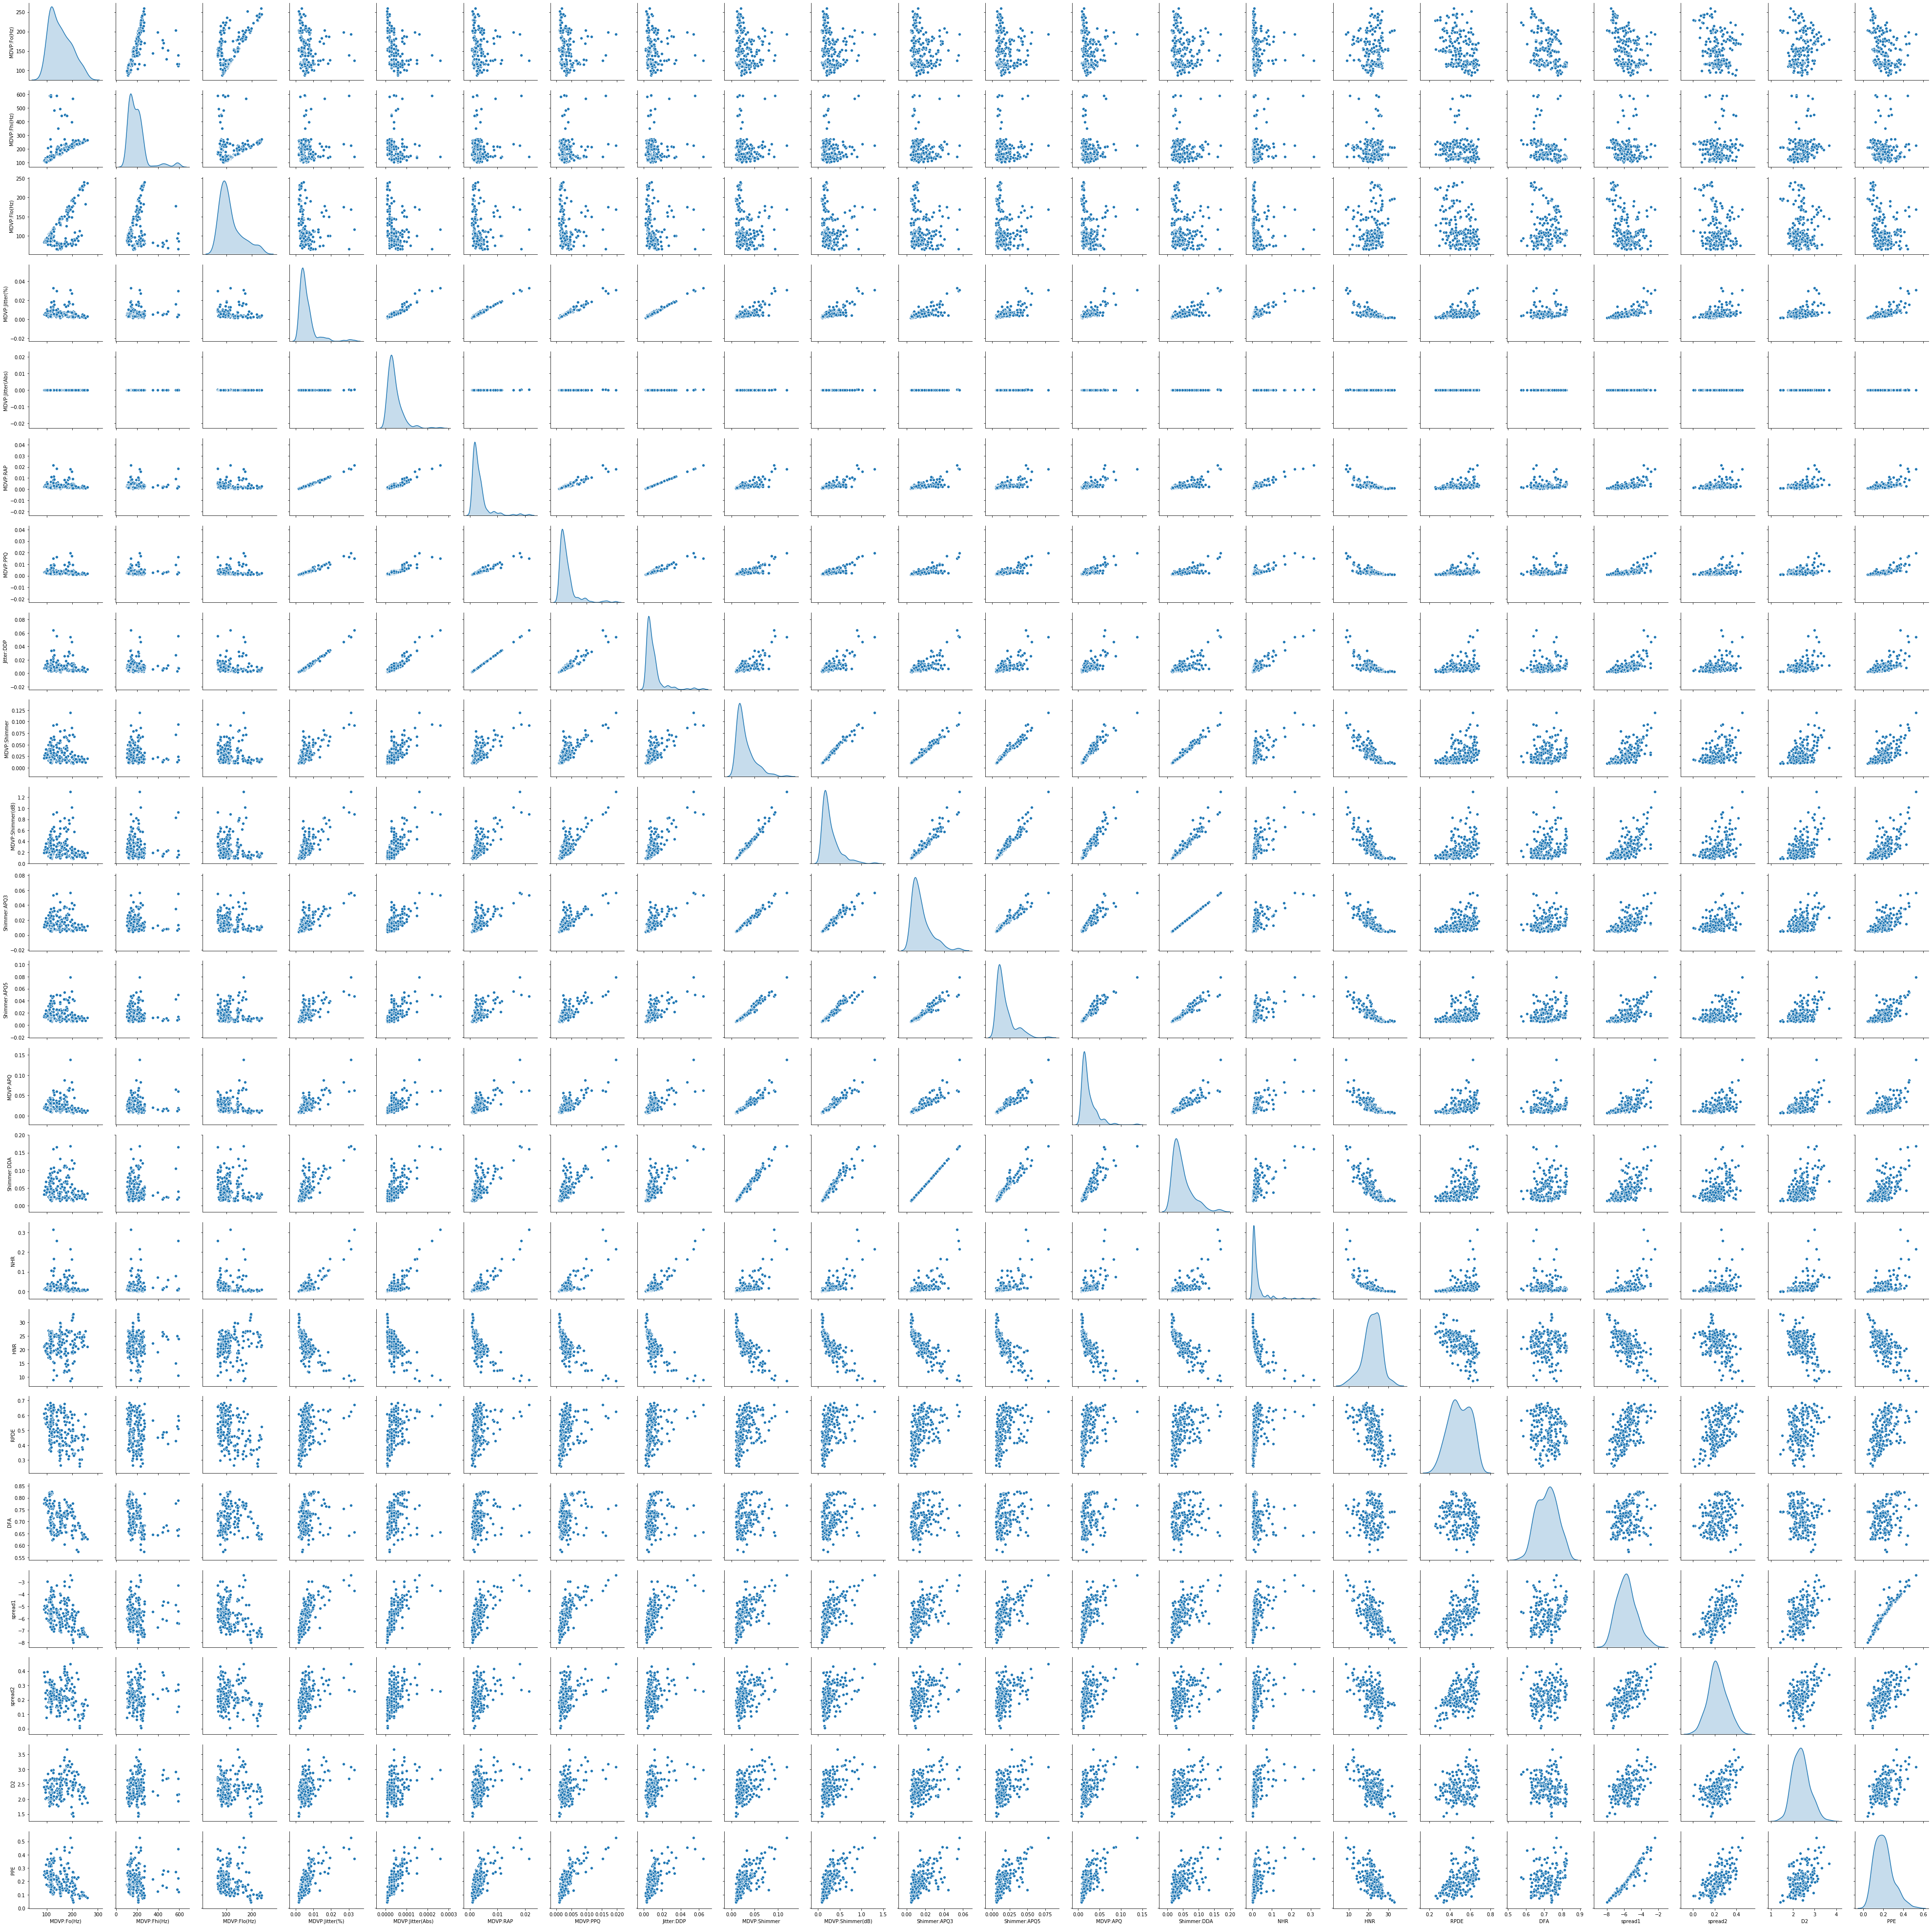

In [20]:
#sns.pairplot(X,diag_kind='kde');

In [21]:
ss=StandardScaler()
X=ss.fit_transform(X)

In [22]:
X

array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.48047686,
        -0.21053082,  0.86888575],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.31118546,
         0.27507712,  1.80360503],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.01768236,
        -0.10362861,  1.40266141],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -0.81807931,
         0.78033848, -0.83241014],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.22906571,
        -0.63700298, -0.92610456],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.43085284,
         0.45480231, -0.64505466]])

# Q4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test)

In [23]:
X.shape

(195, 22)

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)

# Q5. Create the model using “entropy” method of reducing the entropy and fit it to training data.¶

In [25]:
dt_model=DecisionTreeClassifier(criterion='entropy')

In [26]:
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
print("Features importance : \n {}".format(dt_model.feature_importances_))

Features importance : 
 [0.29831582 0.         0.         0.         0.         0.
 0.         0.         0.12755728 0.02462124 0.11568843 0.
 0.         0.04737115 0.         0.         0.         0.
 0.38644608 0.         0.         0.        ]


In [28]:
sorted_importance=sorted(dt_model.feature_importances_,reverse=True)

In [29]:
dt_model.score(X_train,Y_train) # Accuracy on training data, since it is not a shallow tree
                                # we allowed it to grown till the end , we have accuracy as 1

1.0

# Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab.¶

In [30]:
predict=dt_model.predict(X_test)

In [31]:
dt_model.score(X_test,Y_test)

0.8305084745762712

In [32]:
pd.crosstab(Y_test,predict)

col_0,0,1
status,,
0,11,2
1,8,38


# Q7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help?

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
parameters={'max_depth' : [2,3,4,5,6,7,8,9],
            'min_samples_leaf' : [2,3,4,5,6,7,8,9],
            'criterion' : ('entropy','gini')}
dtmodel_gridsearch=GridSearchCV(dt_model,parameters)

In [35]:
dtmodel_gridsearch.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ('entropy', 'gini'),
             

In [36]:
dtmodel_gridsearch.score(X_train,Y_train)

0.9705882352941176

In [37]:
print("best hyperparameter from the values iserted {}".format(dtmodel_gridsearch.best_estimator_))

best hyperparameter from the values iserted DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [38]:
predict=dtmodel_gridsearch.predict(X_test)

In [39]:
dtmodel_gridsearch.score(X_test,Y_test)

0.8983050847457628

Regularization parametrer improved the accuracy to  by approx 3%

In [40]:
print("Best parameters are {}".format(dtmodel_gridsearch.best_params_))

Best parameters are {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4}


# Q8.Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result?

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf_model=RandomForestClassifier(n_estimators=50,criterion='gini',max_depth=6,min_samples_leaf=4)

In [43]:
rf_model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
rf_model.score(X_train,Y_train)

0.9632352941176471

In [45]:
rf_model.score(X_test,Y_test)

0.9152542372881356

In [46]:
confusion_matrix(Y_test,predict)

array([[11,  2],
       [ 4, 42]], dtype=int64)